In [ ]:
# import tensorflow
# import dlib

In [1]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
# import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

In [2]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
print(X_train[0].shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
(28, 28)


(28, 28)
the label of the last image is  9


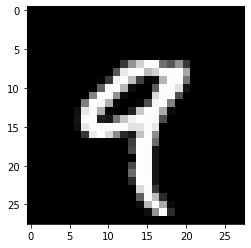

In [3]:
print(X_train[0].shape)
plt.imshow(X_train[4],cmap='gray')
print("the label of the last image is ", y_train[4])


In [4]:
X_train.min()

0

In [5]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255  # xtrain=xtrain/255                      # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
matrix=np.array([1,2,3,4,5,6,7,8,9])
matrix/9



array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
       0.66666667, 0.77777778, 0.88888889, 1.        ])

In [7]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
y_train[0]

5

In [9]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [10]:
Y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [11]:
k=0
for i,j in zip(y_train,Y_train):
  print("before one hot encoding=" ,i,"after one hot encoding=",j)
  k=k+1
  if k==10:
    break
  

before one hot encoding= 5 after one hot encoding= [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
before one hot encoding= 0 after one hot encoding= [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
before one hot encoding= 4 after one hot encoding= [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
before one hot encoding= 1 after one hot encoding= [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
before one hot encoding= 9 after one hot encoding= [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
before one hot encoding= 2 after one hot encoding= [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
before one hot encoding= 1 after one hot encoding= [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
before one hot encoding= 3 after one hot encoding= [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
before one hot encoding= 1 after one hot encoding= [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
before one hot encoding= 4 after one hot encoding= [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [12]:
model = Sequential()

In [13]:
model.add(Dense(512, input_shape=(784,)))##HL1

In [14]:
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256)) ### HL2
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))##output
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

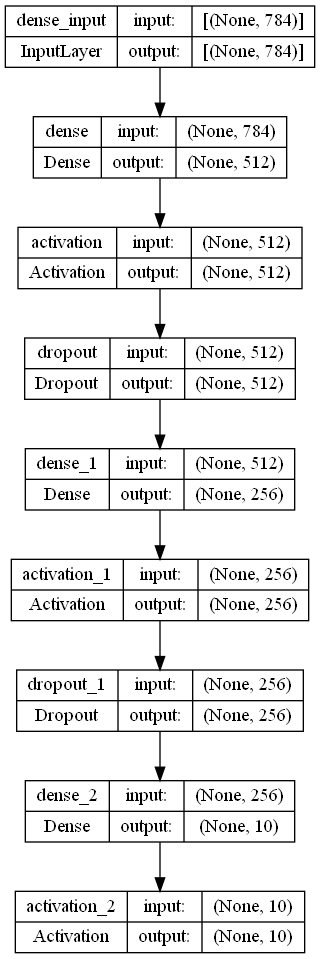

In [15]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history=model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 8s 13ms/step - loss: 0.2665 - accuracy: 0.9211
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1078 - accuracy: 0.9668
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0749 - accuracy: 0.9763
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0586 - accuracy: 0.9815
Epoch 5/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0480 - accuracy: 0.9845
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0402 - accuracy: 0.9869
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0357 - accuracy: 0.9883
Epoch 8/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0312 - accuracy: 0.9895
Epoch 9/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0265 - accuracy: 0.9912
Epoch 10/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0267 - accura

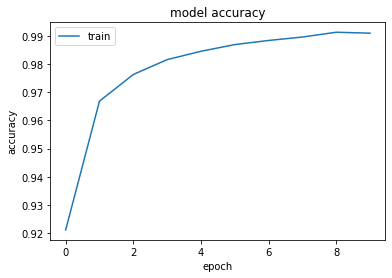

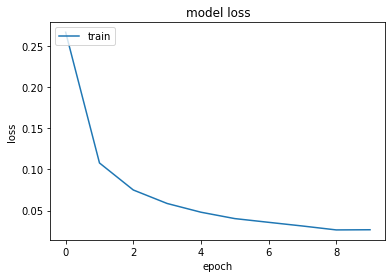

In [18]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [19]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0664 - accuracy: 0.9815
Test score: 0.06644563376903534
Test accuracy: 0.9815000295639038


In [20]:
predicted_classes_values = model.predict(X_test)
predicted_classes_values.shape
predicted_classes=np.argmax(predicted_classes_values,axis=1)
for i,j in zip(predicted_classes,predicted_classes_values):
  print(i,':---->',j)
  break

313/313 [==============================] - 2s 5ms/step
7 :----> [2.1339837e-09 2.8258664e-09 3.2889598e-09 1.2031256e-07 1.2218634e-09
 1.8242095e-10 1.5619911e-13 9.9999940e-01 1.4988577e-10 4.5611984e-07]


In [21]:
# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

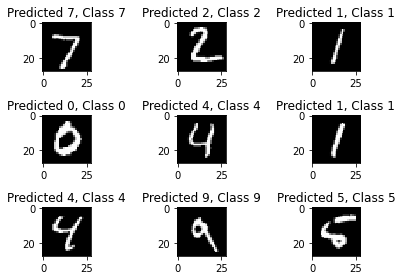

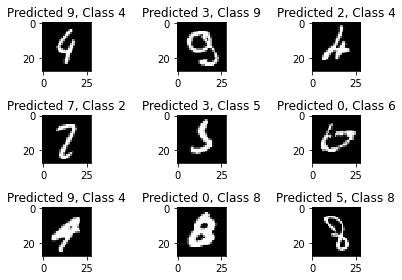

In [22]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

CNN using keras


In [23]:
# import some additional tools
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten

In [24]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [26]:
# one-hot format classes

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [27]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(tf.keras.layers.BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

In [29]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_10 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_11 (Activation)  (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        18496     
                                                      

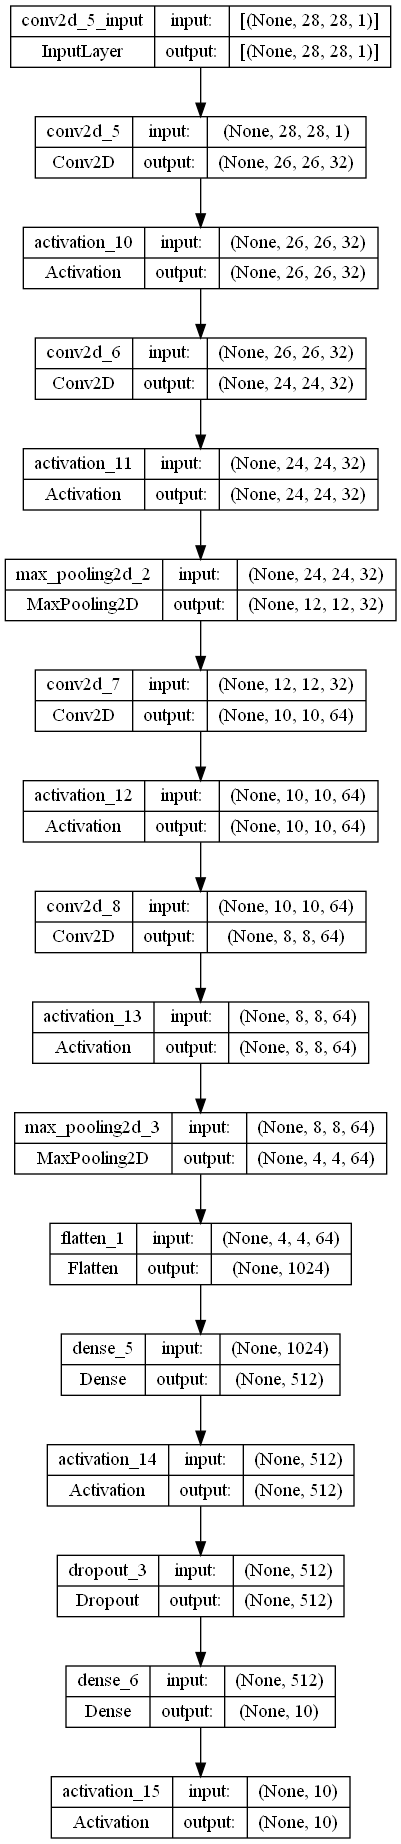

In [31]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [32]:
# we'll use the same optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [34]:
train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [35]:
history=model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

c:\Users\Naman Tamrakar\Desktop\ML-CCPD\.venv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
468/468 [==============================] - 142s 299ms/step - loss: 0.2663 - accuracy: 0.9152 - val_loss: 0.0374 - val_accuracy: 0.9886
Epoch 2/5
468/468 [==============================] - 181s 386ms/step - loss: 0.0730 - accuracy: 0.9774 - val_loss: 0.0293 - val_accuracy: 0.9901
Epoch 3/5
468/468 [==============================] - 138s 294ms/step - loss: 0.0547 - accuracy: 0.9831 - val_loss: 0.0229 - val_accuracy: 0.9921
Epoch 4/5
468/468 [==============================] - 129s 275ms/step - loss: 0.0416 - accuracy: 0.9871 - val_loss: 0.0206 - val_accuracy: 0.9930
Epoch 5/5
468/468 [==============================] - 147s 315ms/step - loss: 0.0385 - accuracy: 0.9882 - val_loss: 0.0206 - val_accuracy: 0.9932


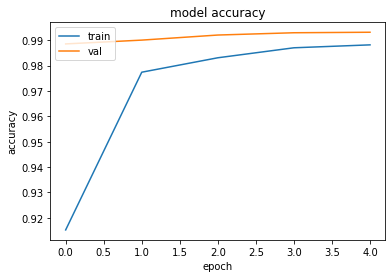

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


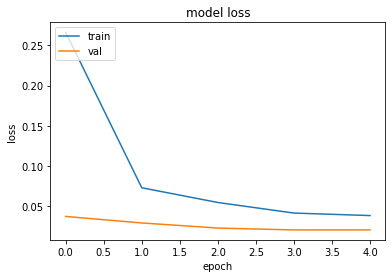

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 7s 21ms/step - loss: 0.0206 - accuracy: 0.9932
Test score: 0.02060680091381073
Test accuracy: 0.9932000041007996
